# Import libraries and load lyrics text files

In [46]:
import string
import os
import urllib.request
import numpy as np
from numpy import array
from random import randint
from urllib.request import urlopen

import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
# from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras.utils.data_utils import pad_sequences

import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from pickle import load
from pickle import dump
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [47]:
# Set working directory
os.chdir('/content/drive/MyDrive/texts')
os.getcwd()

# load lyrics into memory
def load_lyrics(filename):
    # open the lyrics as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# load lyrics
in_filename = '/content/drive/MyDrive/texts/Action Bronson_lyrics_of_50_songs_v2.txt'
lyrics = load_lyrics(in_filename)
print(lyrics[:500])

Heartbreak drowned sorrows in a large steak

Why you always all on my back?
Why you gotta do me like that?
Why you gotta act like a bitch when I'm with you?
Baby girl, I'm blue

Because you treat me like shit
I paid for the bed and never even slept in it
I paid for that crib I never stepped foot in
And now somebody else is eating all the pudding
Things change, now my dashboard wooden
All black Benz, like a young Doc Gooden
Dark shades, 'cause I'm stone crazy
Girl, we grown, stop playin' on my ph


# Exploring Word Frequencies with NLTK
https://medium.com/@siglimumuni/natural-language-processing-in-python-exploring-word-frequencies-with-nltk-918f33c1e4c3

In [48]:
#Import punctuation and stopwords libraries to account for these in text analysis
nltk.download('punkt')
nltk.download("stopwords")

#list of stopwords
stopwords_list = stopwords.words("english")
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
#tokenize text by words
words = word_tokenize(lyrics)

#check the number of words
print(f"The total number of words in the text is {len(words)}")

The total number of words in the text is 24420


In [50]:
#create an empty list to store words
words_no_punc = []

#iterate through the words list to remove punctuations
for word in words:
    if word.isalpha():
        words_no_punc.append(word.lower())

#print number of words without punctuation
print(f"The total number of words without punctuation is {len(words_no_punc)}")

The total number of words without punctuation is 21183


In [51]:
#create an empty list to store clean words
clean_words = []

#Iterate through the words_no_punc list and add non stopwords to the new clean_words list
for word in words_no_punc:
    if word not in stopwords_list:
        clean_words.append(word)

print(f"The total number of words without punctuation and stopwords is {len(clean_words)}")

The total number of words without punctuation and stopwords is 11834


In [52]:
#find the frequency of words
fdist = FreqDist(clean_words)

#print the 10 most common words
fdist.most_common(10)

[('like', 317),
 ('shit', 133),
 ('got', 122),
 ('know', 94),
 ('man', 92),
 ('fuck', 89),
 ('yeah', 74),
 ('bitch', 67),
 ('get', 66),
 ('uh', 65)]

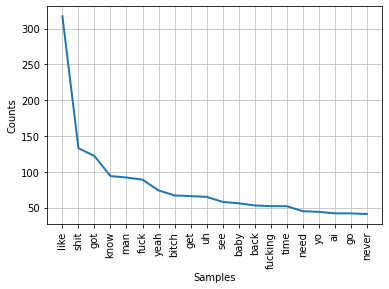

In [53]:
#Plot the 20 most common words
fdist.plot(20)
plt.show()

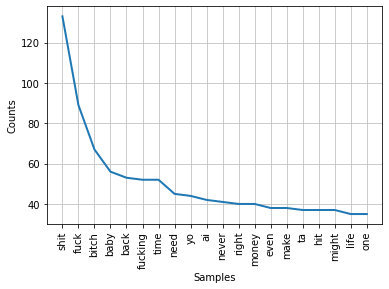

In [54]:
#Update the stopwords list to account for other smaller words that pop up in high frequency
stopwords_list.extend(["like","im","know","got","dont",
                       "yeah","get","man","uh","see",
                       "aint","gotta","thats","go"])

#create an empty list to store clean words
clean_words = []

#Iterate through the words_no_punc list and add non stopwords to the new clean_words list
for word in words_no_punc:
    if word not in stopwords_list:
        clean_words.append(word)

#find the frequency of words
fdist = FreqDist(clean_words)

#Plot the 20 most common words
fdist.plot(20)
plt.show()

In [55]:
#Whoa, that's a lot of profanity - let's carve out those words and see how the frequency plot looks without them

In [60]:
resp = urlopen("https://www.cs.cmu.edu/~biglou/resources/bad-words.txt")
badwords = str(resp.read()).split('\\n')
print(badwords)

# # Save badwords to text file just in case website is taken down

# with open("badwords.txt", "w") as output:
#     output.write(str(badwords))

['b"', 'abbo', 'abo', 'abortion', 'abuse', 'addict', 'addicts', 'adult', 'africa', 'african', 'alla', 'allah', 'alligatorbait', 'amateur', 'american', 'anal', 'analannie', 'analsex', 'angie', 'angry', 'anus', 'arab', 'arabs', 'areola', 'argie', 'aroused', 'arse', 'arsehole', 'asian', 'ass', 'assassin', 'assassinate', 'assassination', 'assault', 'assbagger', 'assblaster', 'assclown', 'asscowboy', 'asses', 'assfuck', 'assfucker', 'asshat', 'asshole', 'assholes', 'asshore', 'assjockey', 'asskiss', 'asskisser', 'assklown', 'asslick', 'asslicker', 'asslover', 'assman', 'assmonkey', 'assmunch', 'assmuncher', 'asspacker', 'asspirate', 'asspuppies', 'assranger', 'asswhore', 'asswipe', 'athletesfoot', 'attack', 'australian', 'babe', 'babies', 'backdoor', 'backdoorman', 'backseat', 'badfuck', 'balllicker', 'balls', 'ballsack', 'banging', 'baptist', 'barelylegal', 'barf', 'barface', 'barfface', 'bast', 'bastard ', 'bazongas', 'bazooms', 'beaner', 'beast', 'beastality', 'beastial', 'beastiality', 

## Remove stopwords and curse words to see how often Action sulks in Knicks misery and talks about random food he cooks


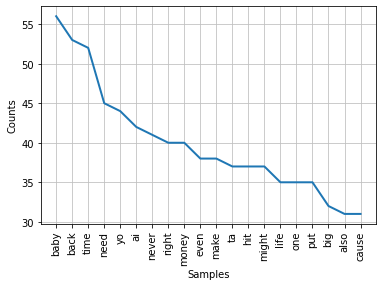

In [57]:
#Update the extended stopwords list to include badwords
nocurses = stopwords_list.extend(["like","im","know","got","dont",
                                  "yeah","get","man","uh","see",
                                  "aint","gotta","thats","go"]+badwords)

#create an empty list to store clean words
clean_words = []

#Iterate through the words_no_punc list and add non stopwords to the new clean_words list
for word in words_no_punc:
    if word not in stopwords_list:
        clean_words.append(word)

#find the frequency of words
fdist = FreqDist(clean_words)

#Plot the 20 most common words
fdist.plot(20)
plt.show()

## Quite anticlimactic as I expected copious references to John Starks and tuna :'(

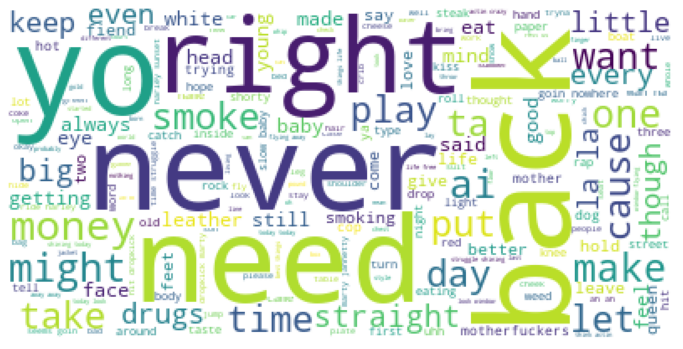

In [58]:
#Convert word list to a single string
clean_words_string = " ".join(clean_words)

#generating the wordcloud
wordcloud = WordCloud(background_color="white").generate(clean_words_string)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

#to remove the axis value
plt.axis("off")
plt.show()

## Clean, tokenize, and create sequences of lyrics

In [ ]:
# turn a doc into clean tokens
def clean_doc(doc):
    # replace '--' with a space ' '
    doc = doc.replace('--', ' ')
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # make lower case
    tokens = [word.lower() for word in tokens]
    return tokens

# clean document
tokens = clean_doc(lyrics)
print(tokens[:200])
print('Total Tokens: %d' % len(tokens))
print('Unique Tokens: %d' % len(set(tokens)))

['heartbreak', 'drowned', 'sorrows', 'in', 'a', 'large', 'steak', 'why', 'you', 'always', 'all', 'on', 'my', 'back', 'why', 'you', 'gotta', 'do', 'me', 'like', 'that', 'why', 'you', 'gotta', 'act', 'like', 'a', 'bitch', 'when', 'im', 'with', 'you', 'baby', 'girl', 'im', 'blue', 'because', 'you', 'treat', 'me', 'like', 'shit', 'i', 'paid', 'for', 'the', 'bed', 'and', 'never', 'even', 'slept', 'in', 'it', 'i', 'paid', 'for', 'that', 'crib', 'i', 'never', 'stepped', 'foot', 'in', 'and', 'now', 'somebody', 'else', 'is', 'eating', 'all', 'the', 'pudding', 'things', 'change', 'now', 'my', 'dashboard', 'wooden', 'all', 'black', 'benz', 'like', 'a', 'young', 'doc', 'gooden', 'dark', 'shades', 'cause', 'im', 'stone', 'crazy', 'girl', 'we', 'grown', 'stop', 'playin', 'on', 'my', 'phone', 'baby', 'all', 'your', 'childish', 'attempts', 'to', 'make', 'me', 'angry', 'fall', 'short', 'which', 'only', 'fuels', 'the', 'rage', 'you', 'have', 'because', 'you', 'have', 'nothing', 'understandable', 'im', '

In [ ]:
# organize into sequences of tokens
length = 50 + 1
sequences = list()
for i in range(length, len(tokens)):
    # select sequence of tokens
    seq = tokens[i-length:i]
    # convert into a line
    line = ' '.join(seq)
    # store
    sequences.append(line)
print('Total Sequences: %d' % len(sequences))

Total Sequences: 20979


In [ ]:
# save tokens to file, one dialog per line
def save_doc(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()
    
# save sequences to file
out_filename = '/content/drive/MyDrive/texts/action_bronson_sequences.txt'
save_doc(sequences, out_filename)

## Train Language Model

In [ ]:
# load
in_filename = '/content/drive/MyDrive/texts/action_bronson_sequences.txt'
lyrics = load_lyrics(in_filename)
lines = lyrics.split('\n')

# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)
# vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# separate into input and output
sequences = array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)
seq_length = X.shape[1]

# define model
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
model.fit(X, y, batch_size=128, epochs=100)

# save the model to file
model.save('model.h5')
# save the tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            215850    
                                                                 
 lstm (LSTM)                 (None, 50, 100)           60400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 4317)              436017    
                                                                 
Total params: 802,767
Trainable params: 802,767
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
164/164 [========================

## Load nlp model and predict lyrics

In [14]:
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# generate a sequence from a language model
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
	result = list()
	in_text = seed_text
	# generate a fixed number of words
	for _ in range(n_words):
		# encode the text as integer
		encoded = tokenizer.texts_to_sequences([in_text])[0]
		# truncate sequences to a fixed length
		encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
		# predict probabilities for each word
		yhat = model.predict(encoded, verbose=0)
		# map predicted word index to word
		out_word = ''
		for word, index in tokenizer.word_index.items():
			if index == np.argmax(yhat,axis=1):
				out_word = word
				break
		# append to input
		in_text += ' ' + out_word
		result.append(out_word)
	return ' '.join(result)

# load cleaned text sequences
in_filename = '/content/drive/MyDrive/texts/action_bronson_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')
seq_length = len(lines[0].split()) - 1

# load the model
model = load_model('model.h5')

# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))

# select a seed text
seed_text = lines[randint(0,len(lines))]
print(seed_text + '\n')

# generate new text
generated = generate_seq(model, tokenizer, seq_length, seed_text, 10)
print(generated)

hawaiian rayman aight i get the same one every single time i dont understand this at the piano with a glass of pinot all red silk like im nino custom made shit i weight kilos sneeze on hoes on their knees blow from montego the way my hair look you swear

here else my ho chronological i hit the lot to
